In [1]:
import pandas as pd
import numpy as np
from importlib import reload
import features_selection as fs
from data_cleaning import save

import modelisation as mod

reload(fs)
reload(mod)

pd.options.mode.chained_assignment = None

In [9]:
df = fs.load_data("../data/data_cleaned.pkl")

In [10]:
df.head(10)


,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue
0,other_classes,X-RAY DIFFRACTION,others_macro_mol,20,1.90,6360.30,vapor diffusion hanging drop,293.0,1.78,30.89,neutre
1,other_classes,X-RAY DIFFRACTION,others_macro_mol,20,1.90,6360.30,vapor diffusion hanging drop,293.0,1.78,30.89,neutre
2,other_classes,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,vapor diffusion hanging drop,293.0,3.09,60.20,basique
3,other_classes,X-RAY DIFFRACTION,others_macro_mol,24,2.20,7637.17,vapor diffusion sitting drop,277.0,2.28,46.06,neutre
4,other_classes,X-RAY DIFFRACTION,others_macro_mol,24,2.20,7637.17,vapor diffusion sitting drop,277.0,2.28,46.06,neutre
5,other_classes,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,vapor diffusion hanging drop,293.0,3.09,60.20,basique
6,other_classes,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,vapor diffusion hanging drop,293.0,3.09,60.30,basique
7,other_classes,X-RAY DIFFRACTION,Protein,153,1.71,18030.63,vapor diffusion hanging drop,293.0,1.87,34.30,neutre
8,other_classes,X-RAY DIFFRACTION,Protein,153,2.02,18030.63,vapor diffusion hanging drop,293.0,1.83,33.00,basique
9,other_classes,X-RAY DIFFRACTION,Protein,154,1.99,18181.84,vapor diffusion hanging drop,293.0,3.05,59.70,basique


In [11]:
num_features = fs.handle_skewness(df)

In [12]:
num_features.columns

Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol'],
      dtype='object')

In [13]:
num_feats_scaled = fs.scaleData(num_features)

In [14]:
num_feats_scaled.head()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol
0,-2.895749,-0.768603,-2.093612,0.117257,-1.870453,-2.318529
1,-2.895749,-0.768603,-2.093612,0.117257,-1.870453,-2.318529
2,-1.467646,-0.477369,-1.411259,0.117257,0.478864,0.594824
3,-2.768191,-0.270369,-1.974326,-0.847508,-0.815981,-0.810662
4,-2.768191,-0.270369,-1.974326,-0.847508,-0.815981,-0.810662


In [15]:
for col in num_feats_scaled:
    df[col] = num_feats_scaled[col]
df.head()

,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue
0,other_classes,X-RAY DIFFRACTION,others_macro_mol,-2.895749,-0.768603,-2.093612,vapor diffusion hanging drop,0.117257,-1.870453,-2.318529,neutre
1,other_classes,X-RAY DIFFRACTION,others_macro_mol,-2.895749,-0.768603,-2.093612,vapor diffusion hanging drop,0.117257,-1.870453,-2.318529,neutre
2,other_classes,X-RAY DIFFRACTION,Protein,-1.467646,-0.477369,-1.411259,vapor diffusion hanging drop,0.117257,0.478864,0.594824,basique
3,other_classes,X-RAY DIFFRACTION,others_macro_mol,-2.768191,-0.270369,-1.974326,vapor diffusion sitting drop,-0.847508,-0.815981,-0.810662,neutre
4,other_classes,X-RAY DIFFRACTION,others_macro_mol,-2.768191,-0.270369,-1.974326,vapor diffusion sitting drop,-0.847508,-0.815981,-0.810662,neutre


In [16]:
cat_data = df.select_dtypes(include = object).drop('classification', axis=1)
df = pd.get_dummies(df, prefix_sep= '_', drop_first=False, columns=cat_data.columns)
df.head()

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,experimentalTechnique_X-RAY DIFFRACTION,experimentalTechnique_others_tech_exp,macromoleculeType_Protein,...,macromoleculeType_Protein#RNA,macromoleculeType_others_macro_mol,crystallizationMethod_microbatch,crystallizationMethod_others_cryst_method,crystallizationMethod_vapor diffusion,crystallizationMethod_vapor diffusion hanging drop,crystallizationMethod_vapor diffusion sitting drop,phValue_acide,phValue_basique,phValue_neutre
0,other_classes,-2.895749,-0.768603,-2.093612,0.117257,-1.870453,-2.318529,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,other_classes,-2.895749,-0.768603,-2.093612,0.117257,-1.870453,-2.318529,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,other_classes,-1.467646,-0.477369,-1.411259,0.117257,0.478864,0.594824,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,other_classes,-2.768191,-0.270369,-1.974326,-0.847508,-0.815981,-0.810662,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,other_classes,-2.768191,-0.270369,-1.974326,-0.847508,-0.815981,-0.810662,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [17]:
target = df.classification
data = df.drop('classification', axis=1)
data.columns

Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'experimentalTechnique_X-RAY DIFFRACTION',
       'experimentalTechnique_others_tech_exp', 'macromoleculeType_Protein',
       'macromoleculeType_Protein#DNA', 'macromoleculeType_Protein#RNA',
       'macromoleculeType_others_macro_mol',
       'crystallizationMethod_microbatch',
       'crystallizationMethod_others_cryst_method',
       'crystallizationMethod_vapor diffusion',
       'crystallizationMethod_vapor diffusion  hanging drop',
       'crystallizationMethod_vapor diffusion  sitting drop', 'phValue_acide',
       'phValue_basique', 'phValue_neutre'],
      dtype='object')

In [ ]:
#feats = fs.RFE_feat_selection(df_scaled, target, 8)

In [ ]:
#feats

In [18]:
importances = fs.RandomForest_feat_selection(data, target)

<AxesSubplot:>

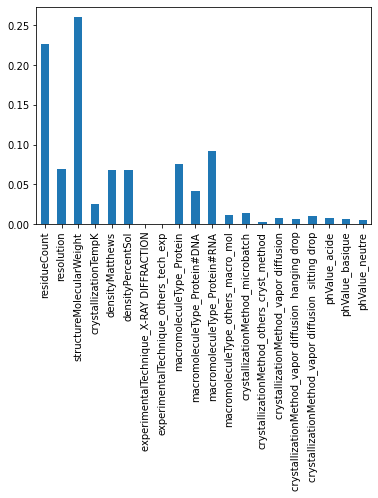

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
importances.plot.bar()

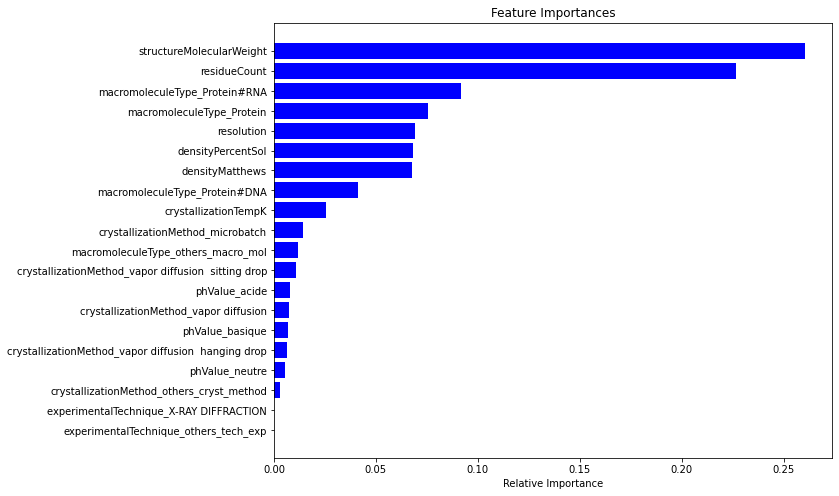

In [20]:
indices = np.argsort(importances) #[-10:] # top 6 features
plt.figure(figsize = (10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [data.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
importances.sort_values(ascending=False)

structureMolecularWeight                               0.257866
residueCount                                           0.219147
densityPercentSol                                      0.082283
densityMatthews                                        0.079935
macromoleculeType_Protein#RNA                          0.076620
resolution                                             0.076421
macromoleculeType_Protein                              0.054881
crystallizationTempK                                   0.033571
macromoleculeType_Protein#DNA                          0.025975
macromoleculeType_others_macro_mol                     0.015806
crystallizationMethod_vapor diffusion  sitting drop    0.015022
crystallizationMethod_microbatch                       0.011740
phValue_acide                                          0.011477
crystallizationMethod_vapor diffusion  hanging drop    0.009629
phValue_basique                                        0.008896
phValue_neutre                          

In [21]:
#Keep the 10 first values 
columns = importances.sort_values(ascending=False)[:10].index
columns
df_final = df[columns]
df_final = df_final.join(target)

In [2]:
save("../data/data_reduced.pkl", df_final)

NameError: name 'df_final' is not defined

In [24]:
df_final.columns

Index(['structureMolecularWeight', 'residueCount',
       'macromoleculeType_Protein#RNA', 'macromoleculeType_Protein',
       'resolution', 'densityPercentSol', 'densityMatthews',
       'macromoleculeType_Protein#DNA', 'crystallizationTempK',
       'crystallizationMethod_microbatch', 'classification'],
      dtype='object')

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import  XGBClassifier


models = [ExtraTreesClassifier(),BaggingClassifier(),
            RandomForestClassifier(),DecisionTreeClassifier()]
             #KNeighborsClassifier(),XGBClassifier(),
              #GradientBoostingClassifier(),SVC(), LinearDiscriminantAnalysis(), 
              #MLPClassifier(),LogisticRegression(), AdaBoostClassifier()]

scores = mod.train_models(models)

  0%|          | 0/12 [00:00<?, ?it/s]

In [4]:
#models_ = [ExtraTreesClassifier(),BaggingClassifier(),
#              RandomForestClassifier(),DecisionTreeClassifier(),
#              KNeighborsClassifier(),XGBClassifier(),
#              GradientBoostingClassifier(),SVC(), LinearDiscriminantAnalysis(), 
#              MLPClassifier(),LogisticRegression(), AdaBoostClassifier()]

scores

[[0.7065287582417227], [0.9000081525537101]]

In [ ]:
models_names =['KNeighborsClassifier','RandomForestClassifier',
              'AdaBoostClassifier','GradientBoostingClassifier', 'DecisionTreeClassifier','ExtraTreesClassifier',
              'BaggingClassifier','XGBClassifier','SVC', 'LinearDiscriminantAnalysis','MLPClassifier','LogisticRegression' ]

